Notebook exploratório para a chegar à visualização do radar plot proposta.

Resumo:
1. Crawling de dados
2. Visualização com base nos códigos da biblioteca de futebol
3. Crítica da visualização
3. Visualização melhorada

Inicialmente precisei fazer um crawler dos dados, visto que as informações que eu precisava do site: https://fbref.com/en/comps/24/Serie-A-Stats não estavam disponibilizadas em um arquivo csv. Para isso, utilizei um tutorial do médiun que me ajudou a entender como fazer o crawler. O tutorial pode ser encontrado em: https://medium.com/@ricardoandreom/how-to-scrape-and-personalize-data-from-fbref-with-python-a-guide-to-unlocking-football-insights-7e623607afca

No entanto, não funcionou como o esperado, já que o site tinha uma disponibilização diferente para os dados da séria A brasileira. Então com algumas modificações no craweler e extraindo apenas o necessário da página html, consegui obter os dados que eu precisava.

In [1]:
# código do crawler
# não importei o html visto que o arquivo seria não legível

# libraries
import pandas as pd

# fbref table link
url_df = '/home/surtas/Área de Trabalho/html.html'

#enconding é necessário para que o arquivo seja lido corretamente
df = pd.read_html(url_df, encoding='utf-8')
df

[    Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                 Class.            Jogador              Nação   
 0                    1    Nicolás Acevedo             uy URU   
 1                    2       Luiz Adriano             br BRA   
 2                    3             Adriel             br BRA   
 3                    4          Adryelson             br BRA   
 4                    5              Adson             br BRA   
 ..                 ...                ...                ...   
 777                749  Vinícius Zanocelo             br BRA   
 778                750      Bruno Zapelli             ar ARG   
 779             Class.            Jogador              Nação   
 780                751   Federico Zaracho             ar ARG   
 781                752              Zinho             br BRA   
 
     Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
                   Pos.             Equipe              Idade   
 0                   LT

In [2]:
df = pd.read_html(url_df, encoding='utf-8')[0]
df

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                Class.            Jogador              Nação   
0                    1    Nicolás Acevedo             uy URU   
1                    2       Luiz Adriano             br BRA   
2                    3             Adriel             br BRA   
3                    4          Adryelson             br BRA   
4                    5              Adson             br BRA   
..                 ...                ...                ...   
777                749  Vinícius Zanocelo             br BRA   
778                750      Bruno Zapelli             ar ARG   
779             Class.            Jogador              Nação   
780                751   Federico Zaracho             ar ARG   
781                752              Zinho             br BRA   

    Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
                  Pos.             Equipe              Idade   
0                   LT              Bahia                 23   
1                   AT      Internacional                 35   
2                    G             Grêmio                 22   
3                   ZG      Botafogo (RJ)                 24   
4                AT.LT        Corinthians                 22   
..                 ...                ...                ...   
777              LT.AT          Fortaleza                 22   
778              LT.AT     Ath Paranaense                 20   
779               Pos.             Equipe              Idade   
780              LT.AT   Atlético Mineiro                 24   
781              AT.LT             Grêmio                 19   

    Unnamed: 6_level_0 Tempo de jogo                  ... A cada 90 minutos  \
            Nascimento            MP  Inícios   Min.  ...            Assis.   
0                 1999            31       21  1.970  ...              0.00   
1                 1987            29       17  1.330  ...              0.07   
2                 2001             2        2    180  ...              0.00   
3                 1998            35       35  2.996  ...              0.03   
4                 2000            15        9    857  ...              0.11   
..                 ...           ...      ...    ...  ...               ...   
777               2001             6        0     81  ...              0.00   
778               2002            21       13  1.143  ...              0.16   
779         Nascimento            MP  Inícios   Min.  ...            Assis.   
780               1998            27       22  1.947  ...              0.05   
781               2003             7        1    244  ...              0.37   

                                                             \
      G+A  G-PB  G+A-PB    xG   xAG  xG+xAG  npxG  npxG+xAG   
0    0.00  0.00    0.00  0.04  0.05    0.10  0.04      0.10   
1    0.27  0.20    0.27  0.18  0.09    0.27  0.18      0.27   
2    0.00  0.00    0.00  0.00  0.00    0.00  0.00      0.00   
3    0.06  0.03    0.06  0.03  0.01    0.04  0.03      0.04   
4    0.11  0.00    0.11  0.04  0.11    0.15  0.04      0.15   
..    ...   ...     ...   ...   ...     ...   ...       ...   
777  0.00  0.00    0.00  0.34  0.00    0.34  0.34      0.34   
778  0.31  0.16    0.31  0.19  0.14    0.34  0.19      0.34   
779   G+A  G-PB  G+A-PB    xG   xAG  xG+xAG  npxG  npxG+xAG   
780  0.14  0.09    0.14  0.14  0.08    0.22  0.14      0.22   
781  0.37  0.00    0.37  0.08  0.20    0.28  0.08      0.28   

    Unnamed: 36_level_0  
               Partidas  
0              Partidas  
1              Partidas  
2              Partidas  
3              Partidas  
4              Partidas  
..                  ...  
777            Partidas  
778            Partidas  
779            Partidas  
780            Partidas  
781            Partidas  

[782 rows x 37 columns]

In [3]:
# creating a data with the same headers but without multi indexing
df.columns = [' '.join(col).strip() for col in df.columns]

df = df.reset_index(drop=True)
df.head()

,Unnamed: 0_level_0 Class.,Unnamed: 1_level_0 Jogador,Unnamed: 2_level_0 Nação,Unnamed: 3_level_0 Pos.,Unnamed: 4_level_0 Equipe,Unnamed: 5_level_0 Idade,Unnamed: 6_level_0 Nascimento,Tempo de jogo MP,Tempo de jogo Inícios,Tempo de jogo Min.,...,A cada 90 minutos Assis.,A cada 90 minutos G+A,A cada 90 minutos G-PB,A cada 90 minutos G+A-PB,A cada 90 minutos xG,A cada 90 minutos xAG,A cada 90 minutos xG+xAG,A cada 90 minutos npxG,A cada 90 minutos npxG+xAG,Unnamed: 36_level_0 Partidas
0,1,Nicolás Acevedo,uy URU,LT,Bahia,23,1999,31,21,1.970,...,0.00,0.00,0.00,0.00,0.04,0.05,0.10,0.04,0.10,Partidas
1,2,Luiz Adriano,br BRA,AT,Internacional,35,1987,29,17,1.330,...,0.07,0.27,0.20,0.27,0.18,0.09,0.27,0.18,0.27,Partidas
2,3,Adriel,br BRA,G,Grêmio,22,2001,2,2,180,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Partidas
3,4,Adryelson,br BRA,ZG,Botafogo (RJ),24,1998,35,35,2.996,...,0.03,0.06,0.03,0.06,0.03,0.01,0.04,0.03,0.04,Partidas
4,5,Adson,br BRA,AT.LT,Corinthians,22,2000,15,9,857,...,0.11,0.11,0.00,0.11,0.04,0.11,0.15,0.04,0.15,Partidas


In [4]:
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)

df.head()


,Class.,Jogador,Nação,Pos.,Equipe,Idade,Nascimento,Tempo de jogo MP,Tempo de jogo Inícios,Tempo de jogo Min.,...,A cada 90 minutos Assis.,A cada 90 minutos G+A,A cada 90 minutos G-PB,A cada 90 minutos G+A-PB,A cada 90 minutos xG,A cada 90 minutos xAG,A cada 90 minutos xG+xAG,A cada 90 minutos npxG,A cada 90 minutos npxG+xAG,Partidas
0,1,Nicolás Acevedo,uy URU,LT,Bahia,23,1999,31,21,1.970,...,0.00,0.00,0.00,0.00,0.04,0.05,0.10,0.04,0.10,Partidas
1,2,Luiz Adriano,br BRA,AT,Internacional,35,1987,29,17,1.330,...,0.07,0.27,0.20,0.27,0.18,0.09,0.27,0.18,0.27,Partidas
2,3,Adriel,br BRA,G,Grêmio,22,2001,2,2,180,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Partidas
3,4,Adryelson,br BRA,ZG,Botafogo (RJ),24,1998,35,35,2.996,...,0.03,0.06,0.03,0.06,0.03,0.01,0.04,0.03,0.04,Partidas
4,5,Adson,br BRA,AT.LT,Corinthians,22,2000,15,9,857,...,0.11,0.11,0.00,0.11,0.04,0.11,0.15,0.04,0.15,Partidas


In [5]:
# salva em um arquivo csv que será utilizado na visualização
df.to_csv("teste", sep=',', index=False, encoding='utf-8')

Inicialmente utilizei a biblioteca de futebol para gerar visualizações inciais.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from mplsoccer import PyPizza, FontManager
warnings.filterwarnings('ignore')

df: pd.DataFrame = pd.read_csv("player_standard_stats.csv")
df.drop(columns=["Rk", "Nation", "Age", "Starts", "Born", "Min", "90s", "Matches", "-9999"], inplace=True) # removendo colunas "inúteis"
df.rename(columns={"Gls.1": "GlsP90", "Ast.1": "AstP90", "G+A.1": "G+AP90", "G-PK.1": "G-PKP90", "xG.1": "xGP90", "xAG.1": "xAGP90", "npxG.1": "npxGP90", "npxG+xAG.1": "npxG+xAGP90"}, inplace=True)

hulk_series: pd.Series = df[(df["Player"] == "Hulk") & (df["Squad"] == "Atlético Mineiro")]
pedro_series: pd.Series = df[(df["Player"] == "Pedro") & (df["Squad"] == "Flamengo")]
rony_series: pd.Series = df[(df["Player"] == "Dudu") & (df["Squad"] == "Palmeiras")]

names = ["xG", "npxG", "PrgC", "PrgR", "GlsP90", "xGP90"]
fowards = df[(df["Pos"].str.contains("FW")) & (df["MP"] >= 25)].describe()[names]
max_values: np.array = fowards.loc["max"].to_numpy()
min_values: np.array = fowards.loc["min"].to_numpy()
descriptive_names: np.array = np.array(["Expected Goals", "Non Penalty Expected Goals", "Progressive Carries", "Progressive Passes Received", "Goals Per 90 Minutes", "Expected Goals Per 90 Minutes"])

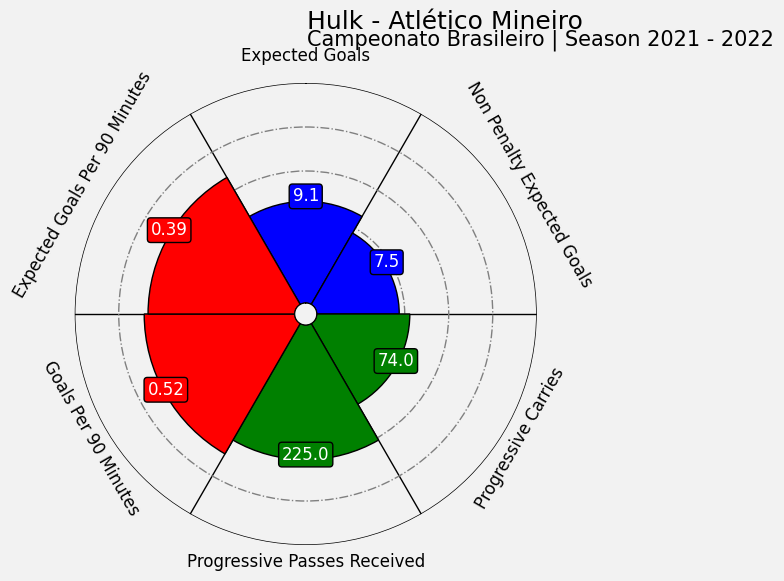

In [7]:
# código copiado do SoccerMatics

values: np.array = hulk_series[names].to_numpy()[0]
values_normalized: np.array = np.round(((values - min_values) / max_values) * 100, 2)
slice_colors = ["blue"] * 2 + ["green"] * 2 + ["red"] * 2
text_colors = ["white"]*6

#PIZZA PLOT
baker = PyPizza(
    params=descriptive_names,
    min_range = None,
    max_range = None,               # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)
#making pizza for our data
fig, ax = baker.make_pizza(
    values_normalized,              # list of values
    figsize=(6, 6),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors, # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(values[i]))
# add title
fig.text(
    0.515, 0.97, "Hulk - Atlético Mineiro", size=18,
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Campeonato Brasileiro | Season 2021 - 2022",
    size=15,
)
plt.show()

No entando esse plot apresenta alguns problemas:
1. As áreas dos semicírculos possuem escalas diferentes, o que na minha visão dificulta o entendimento
2. Os valores usados diferem muito uns dos outros, o ideal seria que tivessem a mesma escala
3. Não é possível comparar os jogadores de maneira clara, os números sozinhos não tem muito valor

Com esses problemas em mente parti para a criação de uma visualização melhorada utilizando o plotly.

Para o terceiro problema parti para a utilização da biblioteca plotly, que é uma biblioteca de visualização de dados interativa. A biblioteca é muito poderosa e permite a criação de gráficos interativo. Utilizei a função Scatterpolar para criar uma representação e utilizei um conjunto de callbacks para que o gráfico fosse atualizado de acordo com o jogador selecionado. Abaixo encontra a primeira versão, ainda tem nenhuma forma de interação.

In [8]:
import plotly.graph_objects as go

fig = go.Figure()
jogador_series: pd.Series = hulk_series
names = ["xG", "npxG", "PrgC", "PrgR", "GlsP90", "xGP90"]

descriptive_names: np.array = np.array(
    [
        "Non Penalty Expected Goals",
        "Progressive Carries",
        "Progressive Passes Received",
        "Goals Per 90 Minutes",
        "Expected Goals Per 90 Minutes",
    ]
)

values: np.array = jogador_series[names].to_numpy()[0]

fig.add_trace(
    go.Scatterpolar(
        r=values, theta=descriptive_names, fill="toself", name="Hulk"
    )
)

fig.update_layout(
    polar={
        "radialaxis": {"visible": True},
    },
    showlegend=True,
)

fig.show()

É possível ver que a visualização não está muito boa devido ao primeiro e segundo problemas. Para resolver, utilizei como base os dados P90, ou seja, por 90 minutos de jogo. Assim, os valores seriam mais próximos e podemos diminuir valores muito fora do padrão. Um batetor de pênalti, por exemplo, teria um valor muito alto de gols, mas 0 em todos os outros indicadores.

A versão final pode ser encontrada no trabalho principal.

Após passar muito tempo fazendo com que a interação funcionasse, decidi que precisava de uma forma de comparar jogadores, não só a outros jogadores, mas também a média da liga. Para isso, adicionei um outro plot no qual é possivel selecionar um jogador e selecionar também ou uma posição ou um time, para comparar as métricas.

Finalizado essa visualização prossegui para uma outra visualização, que é a que está na página Gols Esperados. Nela prossegui da mesma forma, no entanto a parte de interação é diferente. No caso, o usuário deve poder selecionar o time que deseja ver e a janela de jogos que deseja ver. Para isso, utilizei um dropdown para selecionar o time e um radio para selecionar a janela de jogos.

Dessa forma o usuário poderia ver a quantidade de gols esperados e a quantidade de gols feitos por cada time em cada janela de jogos e acompanhar a evolução dessas métricas em todo o campeonato. Essa visualização foi bem direta já que já tinha uma noção de como ela deveria se comportar.